In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics


In [2]:
housedata = pd.read_csv("C:/Users/HP/Documents/kc_house_data (1).csv")

In [3]:
housedata

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Objective
Regression 
This is a dataset containing over 21613 houses and their characteristics. The goal is to find the best model to predict a house’s price. 

 

1. Explore this dataset using what you have learned in data preprocessing and data visualization 

2. Write a paragraph selecting the most important features (feature selection). 

3. Split your dataset into a training set and a testing set. 

4. Apply linear regression to your training set. 

5. Plot the linear regression. 

5. Measure the performance of linear regression using the testing set. 

6. Apply multiple-linear regression and compare it to the linear model. 

7. Apply polynomial regression and compare it to linear and multilinear regression. 

Note: Every result has to be interpreted and justified. Write your interpretations in a markdown.

In [4]:
housedata.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
rel_ft = housedata[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
rel_ft

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [7]:
housedata['waterfront'].nunique() #this is a categorical column

2

In [8]:
housedata['condition'].nunique()

5

In [9]:
housedata[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']].nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

In the dataset giving above i observed that the price 4028 is a numerical dataset,
bedrooms 13 is a categorical dataset,bathrooms 30 categorical, sqft_living 1038 is a categorical dataset, sqft_lot  9782is a categorical dataset,floors 6 is a categorical dataset, waterfront  2 is a categorical dataset, view 5 is a categorical dataset,
condition  5 is a categorical dataset, grade 12 is a categorical dataset, sqft_above 946 is a categorical dataset, sqft_basement 306 is a categorical dataset, yr_built 116 is a numerical dataset, yr_renovated 70 is a numerical dataset, lat 5034 is a categorical dataset, long 752 is a categorical dataset, sqft_living15 777 is a numerical dataset and sqft_lot15 8689 is a categorical dataset.

# Transforming our data using the standard scaler method

In [10]:
sc = StandardScaler()

trans = sc.fit_transform(rel_ft)
trans

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [11]:
trans_df= pd.DataFrame(trans)
trans_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.866717,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.658681,-0.544898,-0.210128,-0.352572,-0.306079,-0.943355,-0.260715
1,-0.005688,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,0.245141,-0.681079,4.746678,1.161568,-0.746341,-0.432686,-0.187868
2,-0.980849,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-0.658681,-1.293892,-0.210128,1.283537,-0.135655,1.070140,-0.172375
3,0.174090,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,1.397515,-0.204446,-0.210128,-0.283288,-1.271816,-0.914174,-0.284522
4,-0.081958,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,-0.658681,0.544548,-0.210128,0.409550,1.199335,-0.272190,-0.192849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,-0.490545,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.087173,-0.305759,-0.629187,0.291916,-0.312039,-0.658681,1.293542,-0.210128,1.004958,-0.938069,-0.666135,-0.412381
21609,-0.381588,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.087173,-0.305759,-0.629187,0.291916,0.629908,-0.658681,1.463768,-0.210128,-0.356180,-1.051685,-0.228419,-0.203946
21610,-0.375865,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,-0.927928,-0.658681,1.293542,-0.210128,0.247888,-0.604321,-1.410253,-0.394141
21611,-0.381588,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.087173,-0.305759,-0.629187,0.291916,-0.227505,-0.658681,1.123316,-0.210128,-0.184414,1.028910,-0.841221,-0.420511


In [12]:
x = trans_df.iloc[:,:-1]
y = trans_df.iloc[:,-1]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2)

In [15]:
#buliding our model multiple linear regression model
hit= LinearRegression()
hit.fit(x_train, y_train)

target = hit.predict(x_test)

In [16]:
target

array([-0.06500044, -0.33507216,  0.10321717, ..., -0.00274554,
       -0.14826249, -0.0066526 ])

In [17]:
print(mean_squared_error(y_test, target))
print(metrics.r2_score(y_test, target))

0.3238884780492931
0.563441316286297


# simple Linear Regression section

In [18]:
x_train = np.array(x_train).reshape(-1,1)
y_test = np.array(x_test).reshape(-1,1) 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2)

In [20]:
#buliding our model multiple linear regression model
boom= LinearRegression()
boom.fit(x_train, y_train)

target = boom.predict(x_test) 

In [21]:
print ('MSE:', mean_squared_error(y_test, target))
print ('R squared:', metrics.r2_score(y_test, target))

MSE: 0.41029078164648275
R squared: 0.5014510993507549


# floor 

In [22]:
#using the floor to predict the price
x_floor = trans_df.iloc[:,5]
y_floor = trans_df.iloc[:,-1]

In [23]:
x_train_floor, x_test_floor, y_train_floor, y_test_floor = train_test_split(x_floor,y_floor, test_size = .2)

In [24]:
x_train_floor = np.array(x_train_floor).reshape(-1,1)
x_test_floor = np.array(x_test_floor).reshape(-1,1)

In [25]:
linearmodel = LinearRegression()
linearmodel.fit(x_train_floor,y_train_floor)

target = linearmodel.predict(x_test_floor)

In [26]:
target

array([ 0.01025751,  0.01025751, -0.00341403, ...,  0.00342174,
       -0.01708558,  0.01025751])

In [27]:
print ('MSE:', mean_squared_error(y_test_floor, target))
print ('R squared:', metrics.r2_score(y_test_floor, target))

MSE: 0.8058658093609606
R squared: 4.067063890966782e-05


# waterfront 

In [28]:
#using the waterfront to predict the price
x_waterfront  = trans_df.iloc[:,6]
y_waterfront = trans_df.iloc[:,-1]

In [29]:
x_train_waterfront , x_test_waterfront , y_train_waterfront , y_test_water = train_test_split(x_waterfront ,y_waterfront , test_size = .2)

In [30]:
x_train_waterfront  = np.array(x_train_waterfront).reshape(-1,1)
x_test_waterfront  = np.array(x_test_waterfront).reshape(-1,1)

In [31]:
linearmodel = LinearRegression()
linearmodel.fit(x_train_waterfront ,y_train_waterfront)

target = linearmodel.predict(x_test_waterfront)

In [32]:
target

array([-0.00737666, -0.00737666, -0.00737666, ..., -0.00737666,
       -0.00737666, -0.00737666])

In [33]:
print ('MSE:', mean_squared_error(x_test_waterfront, target))
print ('R squared:', metrics.r2_score(x_test_waterfront, target))

MSE: 0.6416572923217396
R squared: 0.0514367911898459


# grade    

In [34]:
#using the grade to predict the price
x_grade  = trans_df.iloc[:,8]
y_grade = trans_df.iloc[:,-1]

In [35]:
x_train_grade , x_test_grade , y_train_grade , y_test_grade = train_test_split(x_grade ,y_grade , test_size = .2)

In [36]:
x_train_grade = np.array(x_train_grade).reshape(-1,1)
x_test_grade = np.array(x_test_grade).reshape(-1,1)

In [37]:
linearmodel = LinearRegression()
linearmodel.fit(x_train_grade ,y_train_grade)

target = linearmodel.predict(x_test_grade)

In [38]:
target

array([ 0.00444171,  0.00444171, -0.00061507, ...,  0.00191332,
        0.00444171,  0.00191332])

In [39]:
print ('MSE:', mean_squared_error(x_test_grade, target))
print ('R squared:', metrics.r2_score(x_test_grade, target))

MSE: 1.0030028591435614
R squared: -0.0033960944362334544


# yr_built 

In [40]:
x_yr_bulit = trans_df.iloc[:,12]
y_yr_bulit = trans_df.iloc[:,-1]

In [41]:
x_train_yr_bulit , x_test_yr_bulit , y_train_yr_bulit , y_test_yr_bulit = train_test_split(x_yr_bulit ,y_yr_bulit , test_size = .2)

In [42]:
x_train_yr_bulit = np.array(x_train_yr_bulit).reshape(-1,1)
x_test_yr_bulit = np.array(x_test_yr_bulit).reshape(-1,1)

In [43]:
linearmodel = LinearRegression()
linearmodel.fit(x_train_yr_bulit ,y_train_yr_bulit)

target = linearmodel.predict(x_test_yr_bulit)

In [44]:
target

array([ 0.06978882,  0.02223184, -0.00780416, ...,  0.10483081,
       -0.03784015,  0.06728582])

In [45]:
print ('MSE:', mean_squared_error (y_test_yr_bulit, target))
print ('R squared:', metrics.r2_score (y_test_yr_bulit, target))

MSE: 0.8805001197079699
R squared: 0.003822783207384828


# polynomial regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)

In [47]:
x_poly = poly_reg.fit_transform(x_test_floor)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, x_test_floor)

LinearRegression()

In [48]:
lin_reg = LinearRegression()

In [49]:
lin_reg.fit(x_train_floor, y_train_floor)

LinearRegression()

In [50]:
print('Intercept constant for our linear model:', lin_reg.intercept_)
print('coefficient  of x for our linear model:', lin_reg.coef_)

Intercept constant for our linear model: 0.0034995443976928733
coefficient  of x for our linear model: [-0.00738231]


In [51]:
y_predict = lin_reg.predict(x_test_floor)

In [52]:
import matplotlib.pyplot as plt

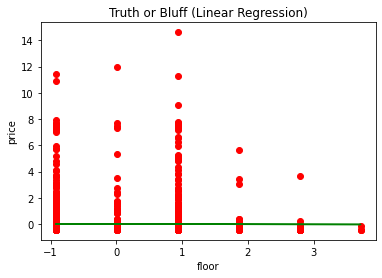

In [53]:
plt.scatter(x_test_floor,y_test_floor,color = 'red')
plt.plot(x_test_floor ,y_predict, color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('floor')
plt.ylabel('price')
plt.show()

In [54]:
x_poly = poly_reg.fit_transform(x_test_floor)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y_test_floor)

LinearRegression()

In [55]:
y_poly_predict = lin_reg_2.predict(x_poly)
y_poly_predict

array([-0.00090677, -0.00090677, -0.00241546, ..., -0.03495171,
       -0.31474128, -0.00090677])

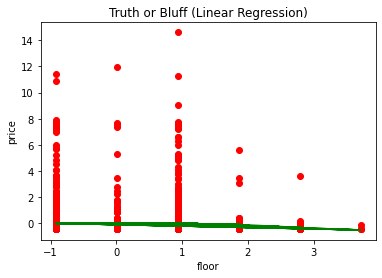

In [56]:
plt.scatter(x_test_floor,y_test_floor,color = 'red')
plt.plot(x_test_floor ,y_poly_predict, color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('floor')
plt.ylabel('price')
plt.show()

From the chat above it has been shown that the Linear Regression Is more clear to read the price of house, unlike the polynomial regression  